In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [2]:
raw_data = pd.read_csv('glass.csv')
raw_data.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


### Q1. Check for outliears and remove if any ?

In [3]:
raw_data.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516523,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


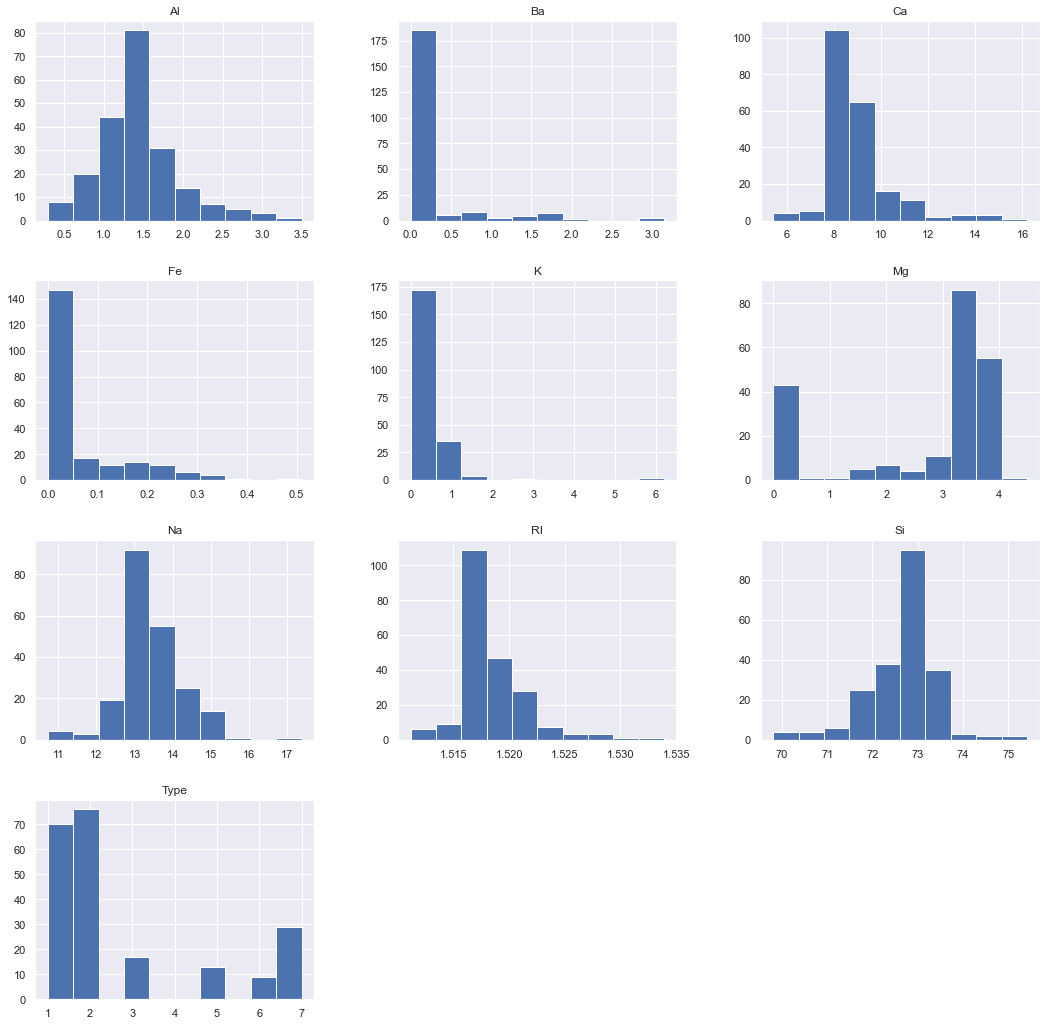

In [4]:
fig = raw_data.hist(figsize = (18,18))


**From above visualization and summary table we can conclude that there are outliears in Fe, Ca, K**

In [5]:
data = raw_data.copy()

**Outliears of Fe**

In [6]:
data['Fe'].describe()

count    214.000000
mean       0.057009
std        0.097439
min        0.000000
25%        0.000000
50%        0.000000
75%        0.100000
max        0.510000
Name: Fe, dtype: float64

In [7]:
q = data['Fe'].quantile(0.98)
q

0.3174000000000001

In [8]:
data = data[data['Fe'] < q]

**Outliears of Ca**

In [9]:
data['Ca'].describe()

count    209.000000
mean       8.936411
std        1.407231
min        5.430000
25%        8.230000
50%        8.600000
75%        9.150000
max       16.190000
Name: Ca, dtype: float64

In [10]:
q = data['Ca'].quantile(0.98)
q

13.4176

In [11]:
data = data[data['Ca']<q]

**Outliears of K**

In [12]:
data['K'].describe()

count    204.000000
mean       0.505098
std        0.663660
min        0.000000
25%        0.130000
50%        0.560000
75%        0.610000
max        6.210000
Name: K, dtype: float64

In [13]:
q = data['K'].quantile(0.99)
q

2.6717999999999993

In [14]:
data = data[data['K']<q]

In [15]:
data.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,1.518115,13.459900,2.793831,1.442488,72.691393,0.437413,8.812040,0.185174,0.049602,2.756219
std,0.002544,0.779686,1.362282,0.475318,0.710155,0.304795,1.069675,0.511208,0.084207,2.127269
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516510,12.960000,2.680000,1.190000,72.360000,0.130000,8.230000,0.000000,0.000000,1.000000
50%,1.517630,13.330000,3.480000,1.380000,72.830000,0.560000,8.590000,0.000000,0.000000,2.000000
75%,1.519050,13.880000,3.600000,1.630000,73.100000,0.600000,9.080000,0.000000,0.090000,3.000000
max,1.531250,17.380000,4.490000,3.500000,75.410000,1.760000,13.300000,3.150000,0.310000,7.000000


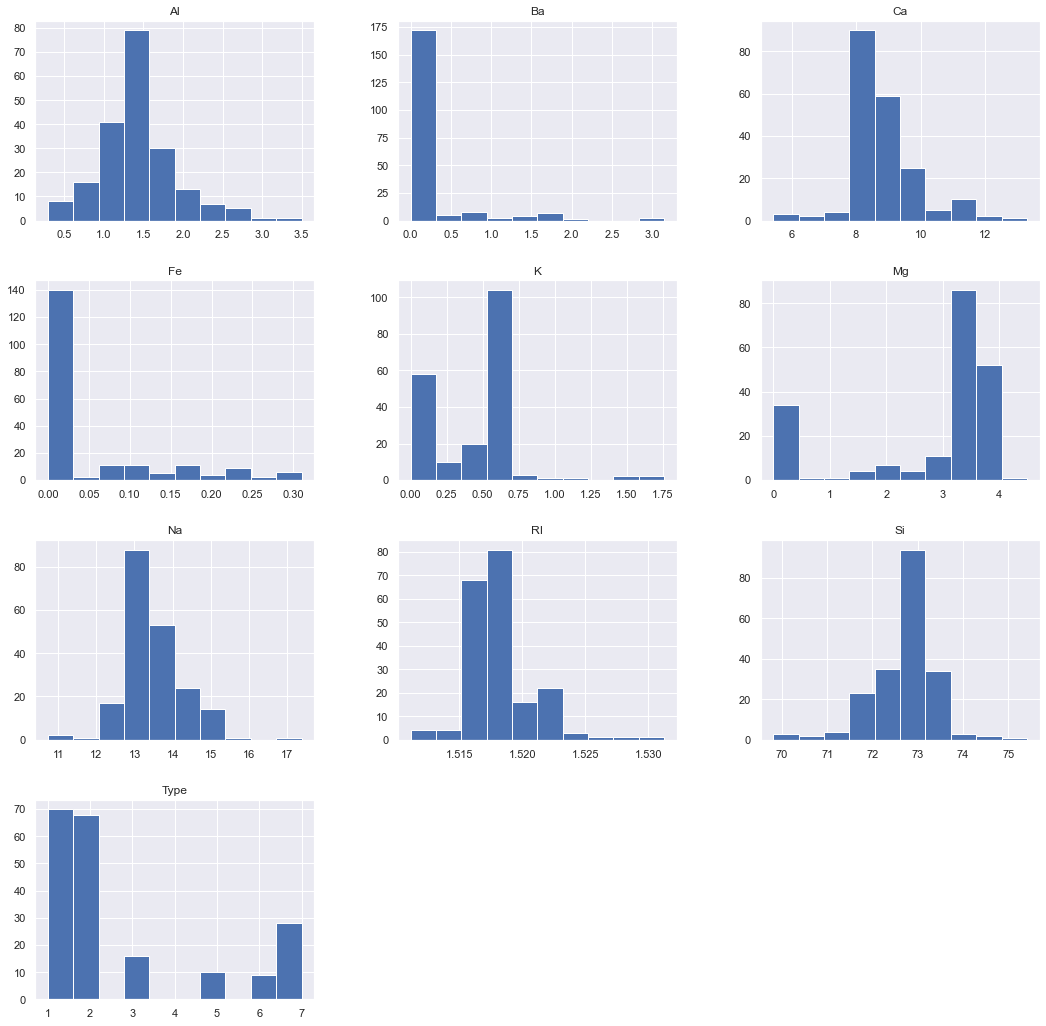

In [16]:
fig = data.hist(figsize=(18,18))

### Q2. Check if any features are related to each other ?

In [17]:
# check correlation
data_num = data.drop('Type', axis=1)
corr = data_num.corr()
corr

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
RI,1.000000,-0.083144,0.011939,-0.377746,-0.637141,-0.275146,0.713188,0.033315,0.052902
Na,-0.083144,1.000000,-0.465162,0.161086,-0.075932,-0.498846,-0.131746,0.331709,-0.273467
Mg,0.011939,-0.465162,1.000000,-0.542552,-0.277001,0.415964,-0.381035,-0.567261,0.115100
Al,-0.377746,0.161086,-0.542552,1.000000,0.080251,0.116604,-0.192838,0.519890,-0.102898
Si,-0.637141,-0.075932,-0.277001,0.080251,1.000000,-0.081643,-0.210311,-0.134592,-0.004581
K,-0.275146,-0.498846,0.415964,0.116604,-0.081643,1.000000,-0.469891,-0.025252,0.080436
Ca,0.713188,-0.131746,-0.381035,-0.192838,-0.210311,-0.469891,1.000000,-0.107822,0.074919
Ba,0.033315,0.331709,-0.567261,0.519890,-0.134592,-0.025252,-0.107822,1.000000,-0.050954
Fe,0.052902,-0.273467,0.115100,-0.102898,-0.004581,0.080436,0.074919,-0.050954,1.000000


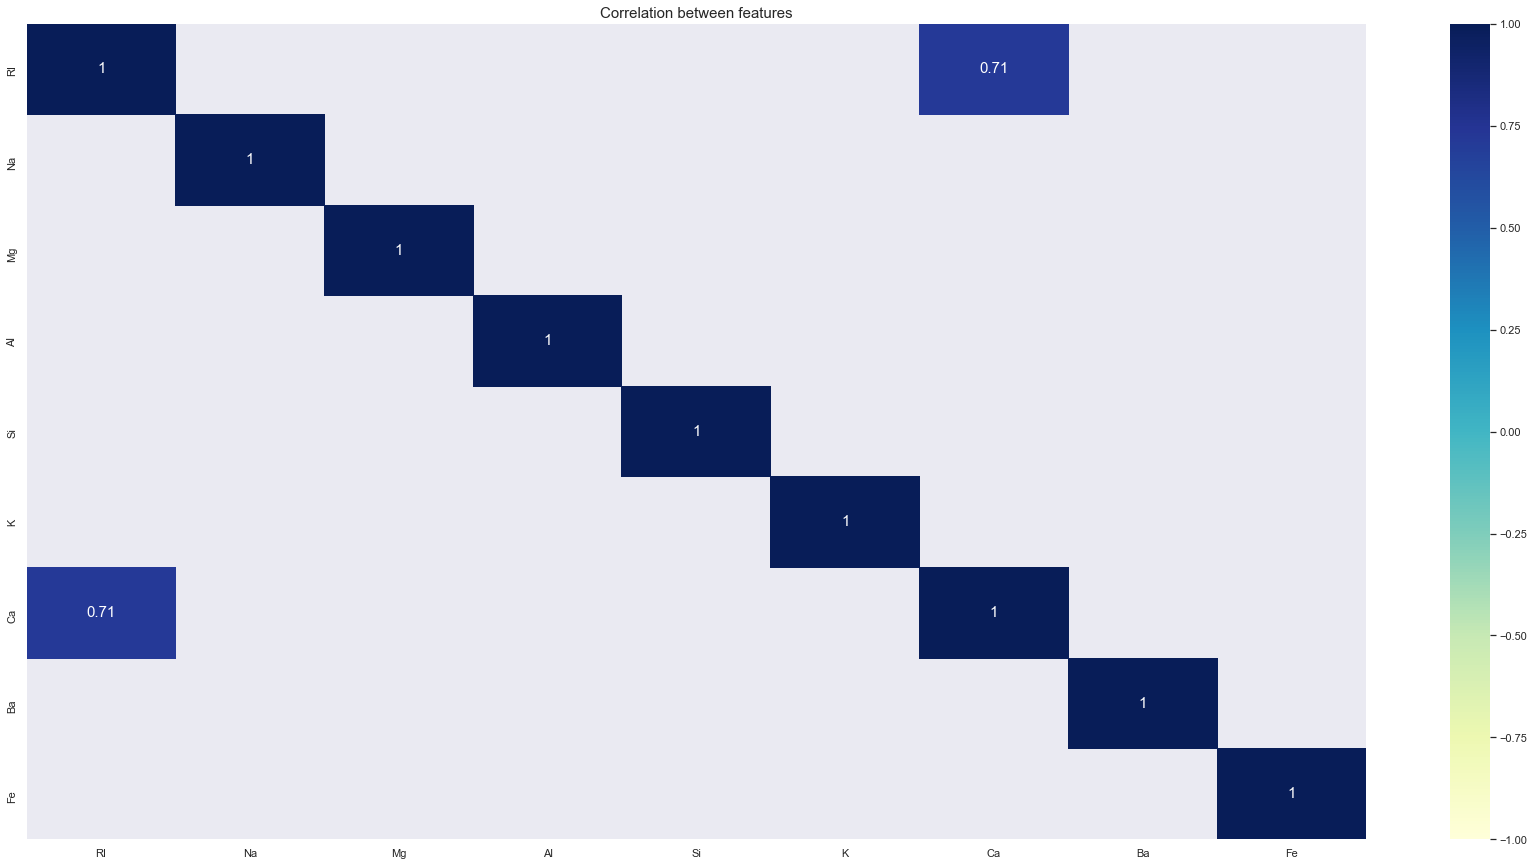

In [18]:
plt.figure(figsize=(30, 15))
sns.heatmap(corr[(corr >= 0.6) | (corr <= -0.7)], 
            cmap='YlGnBu', vmax=1.0, vmin=-1.0,
            annot=True, annot_kws={"size": 15})
plt.title('Correlation between features', fontsize=15)
plt.show()

**As we can see that Ca and Refractive index are correlated**

In [19]:
data = data.drop(['Ca'],axis = 1)

### Q3. Find the optimal value of 'k' in KNN ?

In [20]:
from sklearn.preprocessing import MinMaxScaler

In [21]:
scaler = MinMaxScaler()

In [22]:
x = data.drop(['Type'],axis = 1)
y = data['Type']

In [23]:
scaler.fit(x)

MinMaxScaler()

In [24]:
X = scaler.fit_transform(x)

In [25]:
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(X,y,test_size = 0.2 , random_state = 42)

In [26]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
#create new a knn model
knn = KNeighborsClassifier()
#create a dictionary of all values we want to test for n_neighbors
param_grid = {'n_neighbors': np.arange(1, 10)}
#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn, param_grid, cv=5)
#fit model to data
knn_gscv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([1, 2, 3, 4, 5, 6, 7, 8, 9])})

In [27]:
knn_gscv.best_params_

{'n_neighbors': 2}

In [28]:
knn_gscv.best_score_

0.73125

**Conclusion : By performing Hyperparameter tuning to get optimal value of 'K'**

### Q4. Calculate the mean performance of the model ?

In [29]:
# compare the number of repeats for repeated k-fold cross-validation
from scipy.stats import sem
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot

# evaluate a model with a given number of repeats
def evaluate_model(X, y, repeats):
    # prepare the cross-validation procedure
    cv = RepeatedKFold(n_splits=10, n_repeats=repeats, random_state=1)
    # create model
    model = KNeighborsClassifier(2)
    # evaluate model
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores

# configurations to test
repeats = range(1,16)
results = list()
for r in repeats:
    # evaluate using a given number of repeats
    scores = evaluate_model(X_train, y_train, r)
    results.append(mean(scores))

print("Mean score = ",mean(results))

Mean score =  0.6863083571521071


### Q5. Perform Feature selection and build a KNN Classifier by considering optimal value of k?

In [30]:
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif

X_new = SelectKBest(mutual_info_classif, k=5).fit_transform(X, y)

**After performing feature selection we are selecting top 5 best features**

In [31]:
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(X_new,y,test_size = 0.2 , random_state = 42)

In [32]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
#create new a knn model
knn = KNeighborsClassifier()
#create a dictionary of all values we want to test for n_neighbors
param_grid = {'n_neighbors': np.arange(1, 10)}
#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn, param_grid, cv=5)
#fit model to data
knn_gscv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([1, 2, 3, 4, 5, 6, 7, 8, 9])})

In [33]:
knn_gscv.best_params_

{'n_neighbors': 2}

In [34]:
knn_gscv.best_score_

0.7125

In [35]:
scaler = MinMaxScaler()

In [36]:
x = data.drop(['Type'],axis = 1)
y = data['Type']

In [37]:
scaler.fit(x)

MinMaxScaler()

In [38]:
X = scaler.fit_transform(x)

In [39]:
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(X,y,test_size = 0.2 , random_state = 42)

In [40]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
#create new a knn model
knn = KNeighborsClassifier()
#create a dictionary of all values we want to test for n_neighbors
param_grid = {'n_neighbors': np.arange(1, 10)}
#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn, param_grid, cv=5)
#fit model to data
knn_gscv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([1, 2, 3, 4, 5, 6, 7, 8, 9])})

In [41]:
knn_gscv.best_params_

{'n_neighbors': 2}

In [42]:
knn_gscv.best_score_

0.73125